# Introduction

This jupyter notebook contains code for replicating the equilibrium analysis of Chapter 4. We include more discussion of the process as well as code for generating the results and figures presented. Each of the sections presented below include the section number of the corresponding section of the dissertation for reference. Generally speaking the contents of Chapter 4 are found in Appendices A and B, the contents of Chapter 5 in Appendix C, and the contents of Chapter 6 in Appendix D.

# 4.4    Equilibria of the signaling game

To calculate the equilibria of the signaling game we need the prior probability distribution, which we model as a beta distribution. The beta distribution allows for a fair amount of flexibility for a probability distribution over an interval.

We can visualize this for various values of the shape parameters $\alpha$ and $\beta$. A good thing to keep in mind is that the expected value of the distribution is given by $\frac{\alpha}{\alpha + \beta}$. So, the smaller that $\alpha$ is relative to $\beta$ the more the distribution will be skewed to the left; the larger that $\alpha$ is relative to $\beta$ the more the distribution will be skewed to the right. As a quick example, the uniform distribution over the unit interval is a special case of the beta distribution where $\alpha = \beta = 1$. Note that in this case the expected value of the distribution is $\frac{1}{1 + 1} = \frac{1}{2}$, which should match our intuitions about our best guess about a value drawn from the uniform distribution.

In [2]:
from scipy.stats import beta, uniform
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

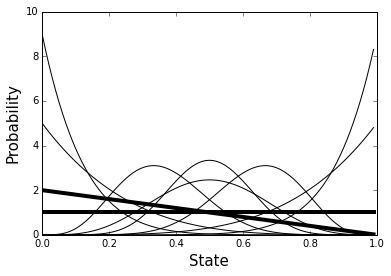

In [18]:
x = np.arange (0, 1, 0.01)
for alpha_var in range(1,10, 4):
    for beta_var in range(1,10, 4):
            y = beta.pdf(x,alpha_var,beta_var)
            plt.plot(x,y, 'k')
plt.plot(x, beta.pdf(x,1,2), linewidth=4, color='k')
plt.plot(x, beta.pdf(x,1,1), linewidth=4, color='k')
plt.ylabel("Probability", fontsize=15)
plt.xlabel("State", fontsize=15)
plt.savefig('../images/beta-distribution.pdf', format='pdf', dpi=1000, fontsize=15) # output to images directory
plt.show()

In [8]:
wallage_data = np.matrix([[393, 203, 52], [346, 296, 42], [294, 179, 60]])
wallage_proportions = wallage_data.sum(axis=0)/float(wallage_data.sum())

In [9]:
def f(params):
    # Unpack parameters
    this_alpha = params[0]
    this_beta = params[1]
    # Calculate probabilities
    new = beta.cdf(1/3.0, this_alpha, this_beta)
    inf = beta.cdf(2/3.0, this_alpha, this_beta) - new
    old = beta.cdf(1, this_alpha, this_beta) - inf - new
    probabilities =  np.array([new, inf, old])
    # Calculate distance
    return np.abs(wallage_proportions - probabilities).sum()

In [10]:
from scipy.optimize import minimize

In [17]:
b_fit = minimize(f, [1,2])
b_fit.x

array([ 1.28340809,  2.59836922])

#  Calculating evolutionarily stable strategies

In [7]:
from sympy.stats import Uniform, Beta, density, E, sample, P
from sympy import symbols

In [45]:
states = symbols('t0:10') # Sufficient for up to ten messages
messages = symbols('m0:10')
actions = symbols('a0:10')
t, b = symbols('t b', positive=True)

In [46]:
from sympy import *
t, m, a, a_0, a_1, m_0, m_1, b = symbols('t m a a_0 a_1 m_0 m_1 b')
t_star = symbols('t_star')

In [47]:
X = Beta("x", 1,2)

part1 = 1 - (actions[0] - t - (1-t)*b)**2
part2 = 1 - (actions[1] - t - (1-t)*b)**2

full_S = integrate(part1*density(X)(t).evalf(), (t, 0, states[0])) + integrate(part2*density(X)(t).evalf(), (t, states[0], 1))
full_R = full_S.subs(b, 0)

In [48]:
t0_sol = Eq(solve(diff(full_S, states[0]), states[0])[0], states[0])
print t0_sol

0.25*(-a0 - a1 + 4.0*b - sqrt((a0 + a1 - 2.0)**2) - 2.0)/(b - 1.0) == t0


In [49]:
a0_sol = Eq(solve(diff(full_R, actions[0]), actions[0])[0], actions[0])
print a0_sol

0.333333333333333*t0*(2.0*t0 - 3.0)/(t0 - 2.0) == a0


In [50]:
a1_sol = Eq(solve(diff(full_R, actions[1]), actions[1])[0], actions[1])
print a1_sol

0.666666666666667*t0 + 0.333333333333333 == a1


In [51]:
result = solve([t0_sol, a0_sol, a1_sol], [states[0], actions[0], actions[1]])

KeyboardInterrupt: 

In [21]:
print result

[((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]


In [52]:
result = [((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]

In [53]:
result[1]

((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0),
 (-0.999999999999999 + 0.333333333333333*(18.0*b + 2.0*sqrt(9.0*b**2 - 18.0*b + 5.0) - 6.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)),
 0.333333333333333 + (6.0*b + 0.666666666666667*sqrt(9.0*b**2 - 18.0*b + 5.0) - 2.0)/(6.0*b - 2.0))

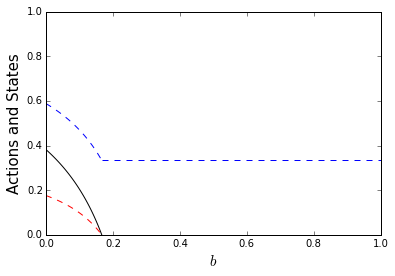

In [54]:
x = np.linspace(0,1/6.0, num=100)

plt.plot(x, [result[1][0].subs(b, value).evalf() for value in x], 'k')
plt.plot(x, [result[1][1].subs(b, value).evalf() for value in x], 'r', linestyle='--')
plt.plot(x, [result[1][2].subs(b, value).evalf() for value in x], 'b', linestyle='--')
plt.axhline(1/3.0, 1/6.0, 1, color='b', ls='--')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel(r"$b$", fontsize=15)
plt.ylabel("Actions and States", fontsize=15)
# Uncomment to save figure
#plt.savefig("sol2-beta.pdf", format='pdf', dpi=1000, fontsize=15)
plt.show()

In [56]:
solve(result[1][0], b)[0]

0.166666666666667